# Aplicação do Machine Learning

## Bibliotecas comuns entre processos

In [3]:
from sklearn.model_selection import train_test_split
from libdata import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, json

%matplotlib inline

## Exploratória


In [4]:
pathData = 'dataFinal.csv'
df = pd.read_csv(pathData)
df.head()

,Sentimento,Texto
0,1,Que coisa linda! O Programa #encontro estava m...
1,1,"Por mais #Encontro com as Irmãs Galvão, adorei..."
2,1,Mr. CATRA @OficialMrCatra lançando sua nova mú...
3,0,quem viu aquela lutadora modela barbuda tatuad...
4,-1,Tô passada com esse cara.... quanta merda pode...


In [5]:
df.iloc[:10, 1]

0    Que coisa linda! O Programa #encontro estava m...
1    Por mais #Encontro com as Irmãs Galvão, adorei...
2    Mr. CATRA @OficialMrCatra lançando sua nova mú...
3    quem viu aquela lutadora modela barbuda tatuad...
4    Tô passada com esse cara.... quanta merda pode...
5          Cibele arrasou, humilhou!! #VideoShowAoVivo
6       Em Minas sacolé é chup chup!  #videoshowaovivo
7    Meu prato MasterChef de sardinha enlatada seri...
8    Esse japa não entendi porra nenhuma de orquíde...
9    A Cearamirinense mais famosa do Brasil no #Ede...
Name: Texto, dtype: object

In [6]:
df.iloc[2,1]

'Mr. CATRA @OficialMrCatra lançando sua nova música PPK CHORA no @SBTTheNoite k k k👅😉'

## Pré-processamento

Passos do pré-processamento:
- Deixar as palavras em vetores
- Limpar texto de espaços excessivos e caracteres especiais.
- Tirar stopwords.
- Normalizar utilizando Stemming.

In [7]:
import re

In [8]:
x = np.array(df.loc[:, 'Texto'])
y = np.array(df.loc[:, 'Sentimento'])

In [9]:
# Transformando 0 em 1, 1 em 2, -1 em 0
y = y + 1
print(y[:5])

[2 2 2 1 0]


In [10]:
only_words = [re.sub("(@[A-Za-z0-9à-úÀ-Ú]+)|([^0-9A-Za-zà-úÀ-Ú ])|(\w+:\/\/\S+)","",i) for i in x]
only_words[:3]

['Que coisa linda O Programa encontro estava mostrando uma familia que adotou um adolescente de 18 anos Que amor',
 'Por mais Encontro com as Irmãs Galvão adorei elas',
 'Mr CATRA  lançando sua nova música PPK CHORA no  k k k']

In [11]:
import unicodedata
import nltk

no_special = []

for word in only_words:
    nfkd_form = unicodedata.normalize('NFKD', word)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    no_special.append(only_ascii.decode('utf-8'))
    
no_special[3]

'quem viu aquela lutadora modela barbuda tatuada MasterChefBR'

In [12]:
words = [np.array(i.lower().strip().split()) for i in no_special]
words[5]

array(['cibele', 'arrasou', 'humilhou', 'videoshowaovivo'],
      dtype='<U15')

In [13]:
from nltk.corpus import stopwords # Import the stop word list

In [14]:
no_stopwords = []

for word in words:
    word = [w for w in word if not w in stopwords.words("portuguese")]
    no_stopwords.append(word)

In [15]:
no_stopwords[3]

['viu', 'lutadora', 'modela', 'barbuda', 'tatuada', 'masterchefbr']

In [16]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("portuguese")

In [17]:
words_stemmed = []

for word in no_stopwords:
    words_stemmed.append([stemmer.stem(t) for t in word])

In [18]:
words_stemmed[3]

['viu', 'lutador', 'model', 'barbud', 'tatu', 'masterchefbr']

In [19]:
clean_doc = []
for word in words_stemmed:
    clean_doc.append(' '.join(word))
clean_doc[3]

'viu lutador model barbud tatu masterchefbr'

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)  

In [21]:
train_data_features = vectorizer.fit_transform(clean_doc)
train_data_features = train_data_features.toarray()

In [22]:
train_data_features.shape

(8363, 5000)

In [23]:
x = train_data_features

## Verificação

In [24]:
print(len(x))
print(x.shape)
print(len(y))
print(y.shape)
print(len(df))
print(df.shape)

8363
(8363, 5000)
8363
(8363,)
8363
(8363, 2)


In [25]:
#Verificação

counter = 0 
not_good = 0
for i in range(len(x)):
    if df.loc[i][0] == y[i] - 1:
        counter += 1
    else: 
        not_good = i
if counter == len(x):
    print("Os valores batem.")
else: 
    print("Os valores não batem no índice:" + str(not_good))

Os valores batem.


## Separação de set de teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Usando Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier(n_estimators = 77, verbose=True)

In [38]:
forest = forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   31.4s finished


In [39]:
print("Score da Random Forest no set de treino: "+str(forest.score(X_train, y_train)))
print("Score da Random Forest no set de teste: "+str(forest.score(X_test, y_test)))

Score da Random Forest no set de treino: 0.985351270553
Score da Random Forest no set de teste: 0.611476389719


[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    0.2s finished


100%|██████████| 99/99 [37:23<00:00, 22.66s/it]


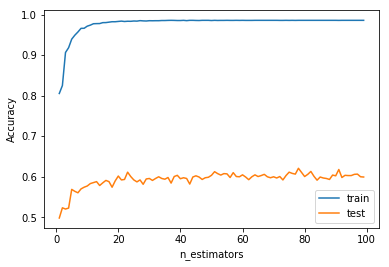

In [31]:
# Teste para a melhor acurácia em função dos estimators

from tqdm import tqdm
def plot_accs(values, accs_train, accs_test, param_name):
    plt.plot(values, accs_train, label='train')
    plt.plot(values, accs_test, label='test')
    plt.ylabel('Accuracy')
    plt.xlabel(param_name)
    plt.legend()

values = list(range(1, 100))
accs_train = []
accs_test = []

for i in tqdm(values):
    forest_test = RandomForestClassifier(n_estimators = i)
    forest_test = forest_test.fit(X_train, y_train)
    accs_train.append(forest_test.score(X_train, y_train))
    accs_test.append(forest_test.score(X_test, y_test))
    
param_name = 'n_estimators'
plot_accs(values, accs_train, accs_test, param_name)

In [36]:
best_estimators = accs_test.index(max(accs_test))
best_estimators

77